## Data Visualization with Python Part 2

#### 01. Importing libraries & data

In [1]:
# Import libraries 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating a path

path = r'C:\Users\Low_Ky_Savage_\Documents\CareerFoundry\03-04-2023 Instacart Basket Analysis'

In [3]:
# Import orders_products_merged.pkl

df = pd.read_pickle(os.path.join(path, '02 Data', '02 Prepared Data', 'orders_products_all.pkl'))

In [4]:
df.shape

(32404859, 28)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 28 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unnamed: 0.1            int64  
 1   Unnamed: 0              int64  
 2   order_id                int64  
 3   user_id                 int64  
 4   order_number            int64  
 5   orders_day_of_week      int64  
 6   order_hour_of_day       int64  
 7   days_since_prior_order  float64
 8   product_id              int64  
 9   add_to_cart_order       int64  
 10  reordered               int64  
 11  product_name            object 
 12  aisle_id                int64  
 13  department_id           int64  
 14  prices                  float64
 15  max_order               int64  
 16  loyalty_flag            object 
 17  avg_price               float64
 18  spending_flag           object 
 19  median_freq             float64
 20  order_freq_flag         object 
 21  gender                  objec

In [6]:
df.head()

,Unnamed: 0.1,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,spending_flag,median_freq,order_freq_flag,gender,state,age,date_joined,number_of_dependants,family_status,income
0,0,0,2539329,1,1,2,8,999.0,196,1,...,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,1,1,2398795,1,2,3,7,15.0,196,1,...,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,2,2,473747,1,3,3,12,21.0,196,1,...,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,3,3,2254736,1,4,4,7,29.0,196,1,...,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,4,4,431534,1,5,4,15,28.0,196,1,...,Low spender,21.0,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


#### 02. Follow the instructions in the Exercise

##### Please refer to 4.9 exercise notebook.

#### 03. Create a histogram of the 'order_hour_of_day' column

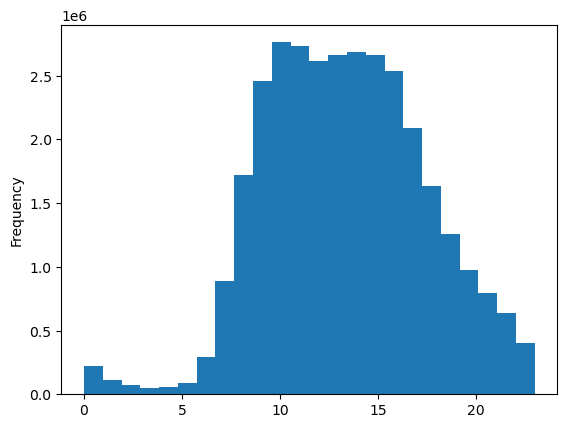

In [7]:
# Creating a histogram of the 'order_hour_of_day' column with 24 bins

busy_hour_hist = df['order_hour_of_day'].plot.hist(bins = 24)

###### This histogram shows what time of day customers are most likely to place orders. We can see that the busiest time of day for placing orders is between 9am and 5pm, with the peak occurring at 10am and 11am.

#### 04. Create a bar chart from the 'loyalty_flag' column

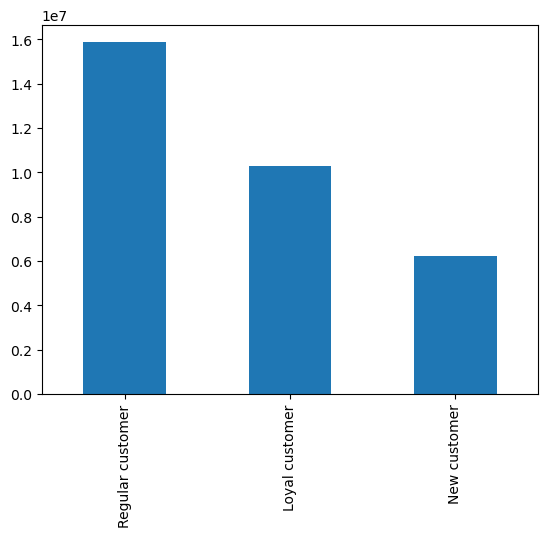

In [10]:
# Creating the bar chart

loyalty_bar = df['loyalty_flag'].value_counts().plot.bar()

###### The following bar chart displays the greatest number of orders coming from regular customers, followed by loyal customers.

#### 05. Making a line chart to check if there's a difference in expenditure depending on hour of day

##### Getting sample set 

In [11]:
# Create a line chart
# Creating a random sample 

np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [12]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [13]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [14]:
# Create a list holding True/False values to the test np.random.rant() <= 0.7

dev = np.random.rand(len(df)) <= 0.7

In [15]:
# Store 70% of sample in the dataframe big

big = df[dev]

In [16]:
# Store remaining 30% of df as df_small

df_small = df[~dev]

In [17]:
# Checking the split

len(df)

32404859

In [24]:
# Reducing df_small to only the columns we need

df_small_2 = df_small[['order_hour_of_day','prices']]

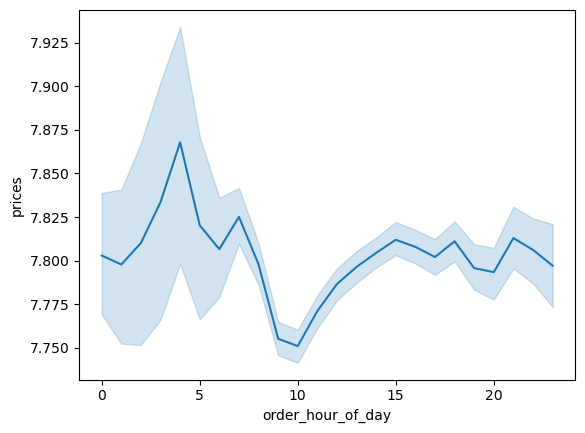

In [25]:
# Making the line chart

price_v_hour_line = sns.lineplot(data = df_small_2, x = 'order_hour_of_day',y = 'prices')

#### 06. Making a line chart to check to see if there's a connection between 'age' and 'number_of_dependants'

In [26]:
# Reducing df_small to only the columns we need

df_small_3 = df_small[['age','number_of_dependants']]

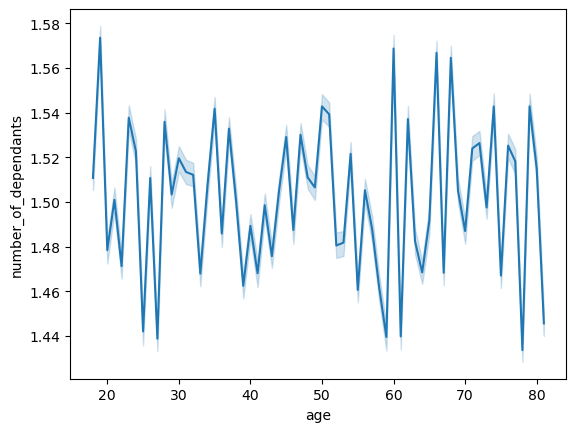

In [27]:
# Making the line chart

age_v_dependents_line = sns.lineplot(data = df_small_3, x = 'age',y = 'number_of_dependants')

###### The following line chart illustrates that there is not really a clear trend between age and dependents. People under 18-20 will not have dependents which is logical. 

#### 07. Making a scatterplot to see if there's a connection between 'age' and 'income'

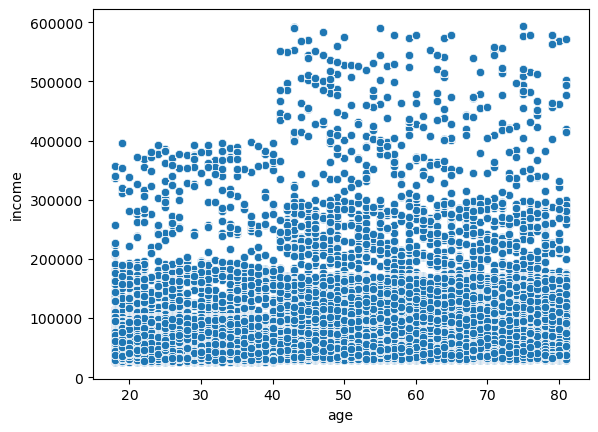

In [29]:
# Create a scatterplot of age and income

scatter_income = sns.scatterplot(data = df, x= 'age', y = 'income')

###### The following scatterplot shows that there is a wide distribution of income even though income increases around 40. Most people are under 200,000.

#### 08. Exporting visualizations

In [30]:
# Exporting busy_hour_hist

busy_hour_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'busy_hour_hist.png'))

In [31]:
# Exporting loyalty_bar

loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_bar.png'))

In [32]:
# Exporting price_v_hour_line

price_v_hour_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_v_hour_line.png'))

In [35]:
# Exporting income_v_age_scatter

scatter_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_v_age_scatter.png'))